# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
***
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [0]:
# 学習済み単語ベクトルのダウンロード
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

--2020-06-05 11:13:31--  https://docs.google.com/uc?export=download&confirm=f1vb&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving docs.google.com (docs.google.com)... 173.194.195.100, 173.194.195.102, 173.194.195.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.195.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-7o-docs.googleusercontent.com/docs/securesc/grgnkosu9fkqt1bp57dnu1hk3o0gptb7/9ppl0emv0juukthp45dlfkgovi11e9vn/1591355550000/06848720943842814915/12373870322035345717Z/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download [following]
--2020-06-05 11:13:33--  https://doc-08-7o-docs.googleusercontent.com/docs/securesc/grgnkosu9fkqt1bp57dnu1hk3o0gptb7/9ppl0emv0juukthp45dlfkgovi11e9vn/1591355550000/06848720943842814915/12373870322035345717Z/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download
Resolving doc-08-7o-docs.googleusercontent.com (doc-08-7o-docs.googleusercontent.com)... 209.85.146.132, 2607:f8b0:4001:c1f::84
Connecting to doc-08-

In [0]:
from gensim.models import KeyedVectors

# 学習済みモデルのロード
model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [0]:
# 単語ベクトルの表示
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度
***
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [0]:
model.similarity('United_States', 'U.S.')

0.73107743

## 62. 類似度の高い単語10件
***
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [0]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## 63. 加法構成性によるアナロジー
***
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [0]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

## 64. アナロジーデータでの実験
***
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [0]:
# データのダウンロード
!wget http://download.tensorflow.org/data/questions-words.txt

--2020-06-04 12:23:59--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.204.128, 2404:6800:4008:c01::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.204.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.006s  

2020-06-04 12:23:59 (102 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [0]:
# 先頭10行の確認
!head -10 questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [0]:
with open('./questions-words.txt', 'r') as f1, open('./questions-words-add.txt', 'w') as f2:
  for line in f1:  # f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
    line = line.split()
    if line[0] == ':':
      category = line[1]
      print(category)
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

capital-common-countries
capital-world
currency
city-in-state
family
gram1-adjective-to-adverb
gram2-opposite
gram3-comparative
gram4-superlative
gram5-present-participle
gram6-nationality-adjective
gram7-past-tense
gram8-plural
gram9-plural-verbs


In [0]:
!head -10 questions-words-add.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235777974128723
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622120857239
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527809739112854
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460992097854614
capital-common-countries Athens Greece Helsinki Finland Finland 0.6899983882904053


## 65. アナロジータスクでの正解率
***
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [0]:
with open('./questions-words-add.txt', 'r') as f:
  sem_cnt = 0
  sem_cor = 0
  syn_cnt = 0
  syn_cor = 0
  for line in f:
    line = line.split()
    if not line[0].startswith('gram'):
      sem_cnt += 1
      if line[4] == line[5]:
        sem_cor += 1
    else:
      syn_cnt += 1
      if line[4] == line[5]:
        syn_cor += 1

print(f'意味的アナロジー正解率: {sem_cor/sem_cnt:.3f}')
print(f'文法的アナロジー正解率: {syn_cor/syn_cnt:.3f}') 

意味的アナロジー正解率: 0.731
文法的アナロジー正解率: 0.740


## 66. WordSimilarity-353での評価
***
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [0]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2020-06-05 11:20:25--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip.1’

wordsim353.zip.1    100%[===================>]  22.71K  --.-KB/s    in 0.03s   

2020-06-05 11:20:25 (770 KB/s) - ‘wordsim353.zip.1’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [0]:
!head -10 './combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [0]:
ws353 = []
with open('./combined.csv', 'r') as f:
  next(f)
  for line in f:  # 1行ずつ読込み、単語ベクトルと類似度を計算
    line = [s.strip() for s in line.split(',')]
    line.append(model.similarity(line[0], line[1]))
    ws353.append(line)

# 確認
for i in range(5):
  print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [0]:
import numpy as np
from scipy.stats import spearmanr

# スピアマン相関係数の計算
human = np.array(ws353).T[2]
w2v = np.array(ws353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数: {correlation:.3f}')

スピアマン相関係数: 0.685


##67. k-meansクラスタリング
***
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [0]:
# 国名の取得
countries = set()
with open('./questions-words-add.txt') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

In [0]:
from sklearn.cluster import KMeans

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Taiwan, Afghanistan, Iraq, Lebanon, Indonesia, Turkey, Egypt, Libya, Syria, Korea, China, Nepal, Cambodia, India, Bhutan, Qatar, Laos, Malaysia, Iran, Vietnam, Oman, Bahrain, Pakistan, Thailand, Bangladesh, Morocco, Jordan, Israel
cluster 1
Madagascar, Uganda, Botswana, Guinea, Malawi, Tunisia, Nigeria, Mauritania, Kenya, Zambia, Algeria, Mozambique, Ghana, Niger, Somalia, Angola, Mali, Senegal, Sudan, Zimbabwe, Gambia, Eritrea, Liberia, Burundi, Gabon, Rwanda, Namibia
cluster 2
Suriname, Uruguay, Tuvalu, Nicaragua, Colombia, Belize, Venezuela, Ecuador, Fiji, Peru, Guyana, Jamaica, Brazil, Honduras, Samoa, Bahamas, Dominica, Philippines, Cuba, Chile, Mexico, Argentina
cluster 3
Netherlands, Sweden, USA, Ireland, Canada, Spain, Malta, Greenland, Europe, Greece, France, Austria, Norway, Finland, Australia, Japan, Iceland, England, Italy, Denmark, Belgium, Switzerland, Germany, Portugal, Liechtenstein
cluster 4
Croatia, Belarus, Uzbekistan, Latvia, Tajikistan, Slovakia, Ukraine,

## 68. Ward法によるクラスタリング
***
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

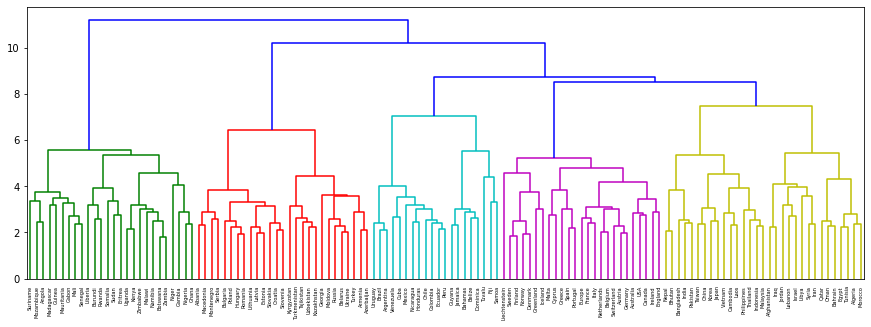

In [0]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

## 69. t-SNEによる可視化
***
国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ．

In [0]:
!pip install bhtsne

     |████████████████████████████████| 92kB 2.7MB/s 
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp36-cp36m-linux_x86_64.whl size=215369 sha256=2a8e516d4b045a604b127f82f7d1bb87e088d1669e41095b241e9899b8760be0
  Stored in directory: /root/.cache/pip/wheels/d3/11/da/b469506296148e4a04bb3bd5083052a2c5d44709851ed17c21
Successfully built bhtsne


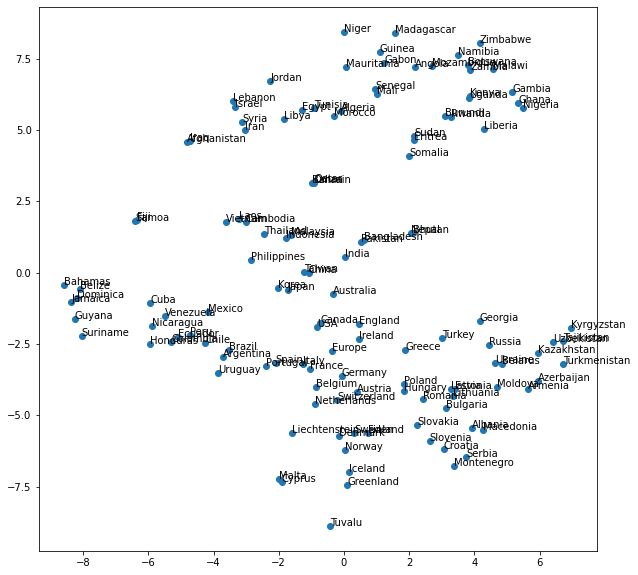

In [0]:
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()